In [1]:
import sys
import os
import pandas as pd
import time
notebook_dir = os.getcwd()
sys.path.append(os.path.join(notebook_dir, '../src'))
from BeeMonitor import VideoAnalyzer

In [2]:
# Initialize the VideoAnalyzer with the paths to the models and the video dimensions
nest_model = '../models/nest_detection_model.pt'
tracking_model = '../models/bee_tracking_model.pt'
analyzer = VideoAnalyzer(nest_model, tracking_model, 720, 1280)

In [3]:
#### load and process csv data from processed videos ###

In [4]:

output_folder = "output"
input_folder = "CVPR_Evaluation_Video_Data"

videos = os.listdir(input_folder)
videos = [os.path.join(input_folder, f) for f in videos if f.endswith('.mp4')]
videos

['CVPR_Evaluation_Video_Data/mendels_2024-05-08_15_00_00.mp4',
 'CVPR_Evaluation_Video_Data/mendels_2024-04-30_09_10_01.mp4',
 'CVPR_Evaluation_Video_Data/mendels_2024-05-23_12_40_00.mp4',
 'CVPR_Evaluation_Video_Data/mendels_2024-04-30_09_00_00.mp4',
 'CVPR_Evaluation_Video_Data/mendels_2024-04-30_09_20_00.mp4',
 'CVPR_Evaluation_Video_Data/mendels_2024-05-08_15_30_00.mp4',
 'CVPR_Evaluation_Video_Data/mendels_2024-04-30_09_30_00.mp4',
 'CVPR_Evaluation_Video_Data/mendels_2024-05-23_12_00_00.mp4',
 'CVPR_Evaluation_Video_Data/mendels_2024-05-08_15_50_00.mp4',
 'CVPR_Evaluation_Video_Data/mendels_2024-04-30_09_40_01.mp4',
 'CVPR_Evaluation_Video_Data/mendels_2024-05-23_18_20_01.mp4']

In [5]:
## Process Videos ###

df = pd.DataFrame()
import traceback

files_not_processed = []
for video_path in videos:
    try:
        print(f"Processing file {video_path}")
        # record start time
        start_time = time.time()

        # get the nest coordinates
        nest_ids = analyzer.getNestDetection(video_path)
        nest = analyzer.processNestDetection(nest_ids)

        # get the motion tracking data
        df_temp = analyzer.getMotionTracking(video_path, nest['hotel'], output_folder, False)
        df_temp.to_csv(os.path.join(output_folder, os.path.basename(video_path) + "_motion_tracking.csv"), index=False)

        # process the motion tracking data to get the foraging events witht the nest coordinates
        events = analyzer.processMotionTracking(df_temp, nest)
        events['video'] = os.path.basename(video_path)
        processed_events = analyzer.synthesizeCSV(events, os.path.basename(video_path))

        # end the time
        end_time = time.time()
        processing_time = end_time - start_time

        # set the processing time for the video file
        events['processing_time'] = [processing_time for i in range(len(events))]
        
        # append the processed data to the dataframe
        df = pd.concat([df, events])
    except Exception as e:
        print(f"Error processing file {video_path}: {e}")
        traceback.print_exc()
        files_not_processed.append(video_path)
        continue


Processing file CVPR_Evaluation_Video_Data/mendels_2024-05-08_15_00_00.mp4
Processing file CVPR_Evaluation_Video_Data/mendels_2024-04-30_09_10_01.mp4
Processing file CVPR_Evaluation_Video_Data/mendels_2024-05-23_12_40_00.mp4
Processing file CVPR_Evaluation_Video_Data/mendels_2024-04-30_09_00_00.mp4


In [6]:
df

,action,nest,frame_number,notes,video,timestamp,filename,processing_time
0,Exit,nest_55,766,Bee exited the nest to move to another hole ne...,mendels_2024-05-08_15_00_00.mp4,2024-05-08 15:00:25,mendels_2024-05-08_15_00_00.mp4,334.279078
1,Entry,nest_55,781,Bee entered the nest from another hole nest_55,mendels_2024-05-08_15_00_00.mp4,2024-05-08 15:00:26,mendels_2024-05-08_15_00_00.mp4,334.279078
2,Entry,nest_54,1123,Bee entered the nest,mendels_2024-05-08_15_00_00.mp4,2024-05-08 15:00:37,mendels_2024-05-08_15_00_00.mp4,334.279078
3,Exit,nest_54,1725,Bee exited the nest,mendels_2024-05-08_15_00_00.mp4,2024-05-08 15:00:57,mendels_2024-05-08_15_00_00.mp4,334.279078
4,Entry,nest_56,2512,Bee entered the nest,mendels_2024-05-08_15_00_00.mp4,2024-05-08 15:01:23,mendels_2024-05-08_15_00_00.mp4,334.279078
...,...,...,...,...,...,...,...,...
108,Exit,nest_19,17149,Bee exited the nest,mendels_2024-05-23_18_20_01.mp4,2024-05-23 18:29:32,mendels_2024-05-23_18_20_01.mp4,373.761753
109,Entry,nest_60,17290,Bee entered the nest,mendels_2024-05-23_18_20_01.mp4,2024-05-23 18:29:37,mendels_2024-05-23_18_20_01.mp4,373.761753
110,Entry,nest_42,17597,Bee entered the nest,mendels_2024-05-23_18_20_01.mp4,2024-05-23 18:29:47,mendels_2024-05-23_18_20_01.mp4,373.761753
111,Exit,nest_6,17815,Bee exited the nest to move to another hole ne...,mendels_2024-05-23_18_20_01.mp4,2024-05-23 18:29:54,mendels_2024-05-23_18_20_01.mp4,373.761753


In [10]:
# load ground truth data ##

In [11]:
ground_truth = pd.read_csv('../Manual_Foraging_Events_Observation.csv')

In [12]:
ground_truth = ground_truth[['video','action','nest','timestamp']].dropna()

In [18]:
df

,action,nest,frame_number,notes,video,timestamp,filename,processing_time
0,Entry,nest_31,3281,Bee entered the nest,mendels_2024-04-30_09_00_00.mp4,2024-04-30 09:01:49,mendels_2024-04-30_09_00_00.mp4,655.748290
1,Exit,nest_56,3349,Bee exited the nest,mendels_2024-04-30_09_00_00.mp4,2024-04-30 09:01:51,mendels_2024-04-30_09_00_00.mp4,655.748290
2,Exit,nest_31,3636,Bee exited the nest,mendels_2024-04-30_09_00_00.mp4,2024-04-30 09:02:01,mendels_2024-04-30_09_00_00.mp4,655.748290
3,Exit,nest_23,3643,Bee exited the nest,mendels_2024-04-30_09_00_00.mp4,2024-04-30 09:02:01,mendels_2024-04-30_09_00_00.mp4,655.748290
4,Exit,nest_53,3877,Bee exited the nest,mendels_2024-04-30_09_00_00.mp4,2024-04-30 09:02:09,mendels_2024-04-30_09_00_00.mp4,655.748290
...,...,...,...,...,...,...,...,...
75,Exit,nest_10,16653,Bee exited the nest to move to another hole ne...,mendels_2024-05-23_18_20_01.mp4,2024-05-23 18:29:16,mendels_2024-05-23_18_20_01.mp4,973.599069
76,Entry,nest_10,16678,Bee entered the nest from another hole nest_10,mendels_2024-05-23_18_20_01.mp4,2024-05-23 18:29:16,mendels_2024-05-23_18_20_01.mp4,973.599069
77,Exit,nest_19,17143,Bee exited the nest,mendels_2024-05-23_18_20_01.mp4,2024-05-23 18:29:32,mendels_2024-05-23_18_20_01.mp4,973.599069
78,Entry,nest_60,17285,Bee entered the nest,mendels_2024-05-23_18_20_01.mp4,2024-05-23 18:29:37,mendels_2024-05-23_18_20_01.mp4,973.599069


In [22]:
# load from final csv
predicted = df[['action', 'nest', 'frame_number',"video","timestamp","filename"]].copy()

In [23]:
#predicted = 
predicted.reset_index(drop=True, inplace=True)

In [24]:
predicted['video'] = predicted['video'].apply(lambda x: x.replace('.mp4', ''))

In [25]:
predicted['nest'] = predicted['nest'].apply(lambda x: x.split('_')[1])

In [26]:
predicted['timestamp'] = predicted['timestamp'].astype(str)
predicted['timestamp'] = predicted['timestamp'].apply(lambda x: x.split(' ')[1])

In [27]:
measured = pd.read_csv('/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/scripts/processor/video_data_extaction_experiment_2.csv')

In [28]:
measured = measured[['video','action','nest','timestamp']].dropna()

In [29]:
from datetime import time
def getTimestamp1(txt):
    hr, mn, s = txt.split(':')
    #return timedelta(hours=int(hr), minutes=int(mn), seconds=int(s))
    return time(int(hr), int(mn), int(s))

In [30]:
measured['timestamp'] = measured['timestamp'].apply(lambda x: getTimestamp1(x))
predicted['timestamp'] = predicted['timestamp'].apply(lambda x: getTimestamp1(x))

In [31]:
measured['site'] = measured['video'].apply(lambda x: x.split('_')[0])
measured['hour'] = measured['timestamp'].apply(lambda x: x.hour)

predicted['site'] = predicted['video'].apply(lambda x: x.split('_')[0])
predicted['hour'] = predicted['timestamp'].apply(lambda x: x.hour)

In [32]:
# filter measured based on videos in predicted
videos = predicted.video.unique().tolist()
videos = [v.replace('.mp4', '') for v in videos]
measured_temp = measured[measured['video'].isin(videos)]

In [33]:
len(measured_temp)

300

In [34]:
measured_temp.reset_index(drop=True, inplace=True)
predicted.reset_index(drop=True, inplace=True)

In [35]:
# filter site
# site = 'mendels'
# site = 'natalies'
# measured_temp = measured_temp[measured_temp['site'] == site]
# measured_temp = measured_temp.reset_index(drop=True)
# predicted = predicted[predicted['site'] == site]
# predicted = predicted.reset_index(drop=True)

In [36]:
class Action:
    def __init__(self, action, timestamp, nest, video):
        self.action = action
        self.timestamp = timestamp
        self.nest = int(nest)
        self.video = video

    def getAction(self):
        return self.action
    
    def getTimestamp(self):
        return self.timestamp
    
    def getNest(self):
        return self.nest
    
    def getVideo(self):
        return self.video

def getActions(df):
    actions = []
    for i in range(len(df)):
        action = Action(df['action'][i], df['timestamp'][i], df['nest'][i], df['video'][i])
        actions.append(action)
    return actions

from datetime import datetime

def time_difference(time1, time2):
    # Convert the time strings to datetime objects
    date_today = datetime.today().date()
    datetime1 = datetime.combine(date_today, time1)
    datetime2 = datetime.combine(date_today, time2)

    # Calculate the difference
    time_difference = datetime1 - datetime2

    # Get the difference in seconds
    difference_in_seconds = time_difference.total_seconds()

    return abs(difference_in_seconds)

def isActionInActions(action, actions):
    for act in actions:
        # if action.action == act.action and time_difference(action.timestamp, act.timestamp) < 5 and action.video == act.video:
        #     return True

        # if action.action == act.action and time_difference(action.timestamp, act.timestamp) < 5 and action.video == act.video and (action.nest - act.nest) < 2:
        #     return True
        
        if action.action == act.action and time_difference(action.timestamp, act.timestamp) < 3 and action.video == act.video and action.nest == act.nest:
            return True
        
        # if action.action == act.action and action.nest == act.nest and time_difference(action.timestamp, act.timestamp) < 5:
        #     return True
    return False

In [37]:
# temp = measured[measured['action'] == 'Entry']
# temp = temp.reset_index(drop=True)
# measured_actions = getActions(temp)


# temp = predicted_temp[predicted_temp['action'] == 'Entry']
# temp = temp.reset_index(drop=True)
# predicted_actions = getActions(temp)

In [38]:
measured_actions = getActions(measured_temp)

In [39]:
predicted_actions = getActions(predicted)


In [40]:
def calculateTruePositives(measured_actions, predicted_actions):
    tp = 0
    objs = []
    for action in predicted_actions:
        if isActionInActions(action, measured_actions):
            tp += 1
            objs.append(action)
    return tp, objs

tp, tp_obj = calculateTruePositives(measured_actions, predicted_actions)
print(tp)

252


In [41]:
tp_df = pd.DataFrame([obj.__dict__ for obj in tp_obj])
tp_df.groupby('action').count()

,timestamp,nest,video
action,,,
Entry,134,134,134
Exit,118,118,118


In [42]:
def calculateFalsePositives(measured_actions, predicted_actions):
    fp = 0
    fp_obj = []
    for action in predicted_actions:
        if not isActionInActions(action, measured_actions):
            fp += 1
            fp_obj.append(action)
    return fp, fp_obj

fp, fp_obj = calculateFalsePositives(measured_actions, predicted_actions)
print(fp)

154


In [43]:
fp_df = pd.DataFrame([obj.__dict__ for obj in fp_obj])
fp_df.groupby('action').count()

,timestamp,nest,video
action,,,
Entry,86,86,86
Exit,68,68,68


In [44]:
def calculateFalseNegatives(measured_actions, predicted_actions):
    fn = 0
    fn_obj = []
    for action in measured_actions:
        if not isActionInActions(action, predicted_actions):
            fn += 1
            fn_obj.append(action)
    return fn, fn_obj

fn, fn_obj = calculateFalseNegatives(measured_actions, predicted_actions)
print(fn)

50


In [45]:
fn_df = pd.DataFrame([obj.__dict__ for obj in fn_obj])
fn_df.groupby('action').count()

,timestamp,nest,video
action,,,
Entry,16,16,16
Exit,34,34,34


In [46]:
def calculatePrecision(measured_actions, predicted_actions):
    tp,_ = calculateTruePositives(measured_actions, predicted_actions)
    fp,_ = calculateFalsePositives(measured_actions, predicted_actions)
    return tp/(tp + fp)

calculatePrecision(measured_actions, predicted_actions)

0.6206896551724138

In [47]:
def calculateRecall(measured_actions, predicted_actions):
    tp,_ = calculateTruePositives(measured_actions, predicted_actions)
    fn,_ = calculateFalseNegatives(measured_actions, predicted_actions)
    return tp/(tp + fn)

calculateRecall(measured_actions, predicted_actions)

0.8344370860927153

In [48]:
### calculate F1 score ###
def calculateF1Score(precision, recall):
    return 2 * (precision * recall) / (precision + recall)

In [49]:
calculateF1Score(calculatePrecision(measured_actions, predicted_actions), calculateRecall(measured_actions, predicted_actions))

0.7118644067796611

In [874]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Hourly distribution of extracted events')

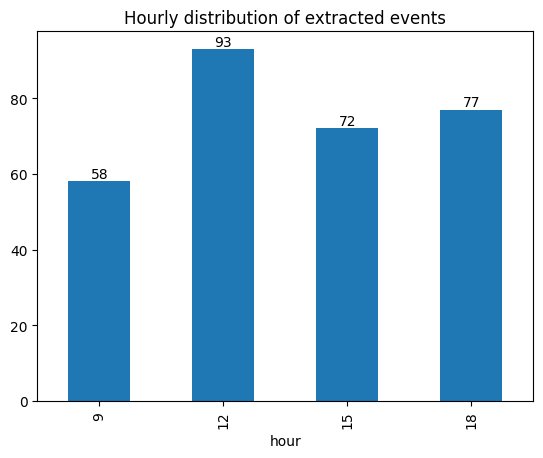

In [875]:
import matplotlib.pyplot as plt

hour_counts = measured_temp.groupby('hour').size()

ax = hour_counts.plot(kind='bar')

for i, v in enumerate(hour_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('Hourly distribution of extracted events')


Text(0.5, 0, 'Event')

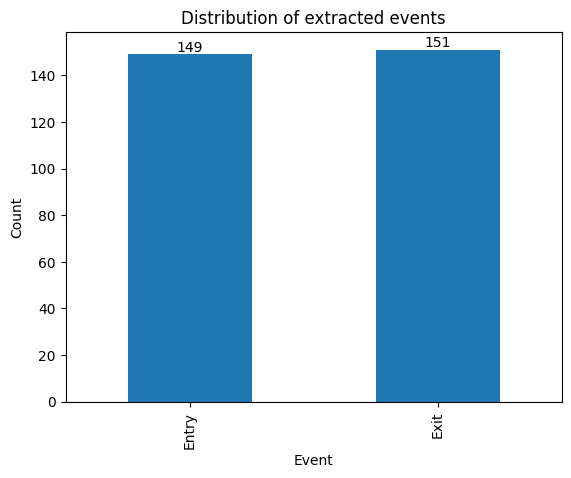

In [876]:
import matplotlib.pyplot as plt

hour_counts = measured_temp.groupby('action').size()

ax = hour_counts.plot(kind='bar')

for i, v in enumerate(hour_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('Distribution of extracted events')
plt.ylabel('Count')
plt.xlabel('Event')


In [877]:
tp_df['hour'] = tp_df['timestamp'].apply(lambda x: x.hour)

(0.0, 1.05)

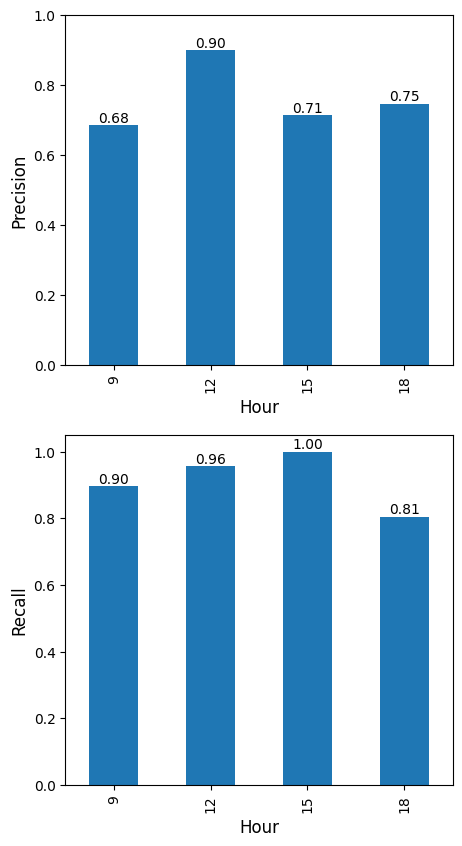

In [878]:
import matplotlib.pyplot as plt

# make plot with two panels
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 10))

font_size = 12

precision = tp_df.groupby('hour').size() / predicted.groupby('hour').size()

ax = precision.plot(kind='bar', ax=ax1)

for i, v in enumerate(precision):
    ax1.text(i, v, f"{v:.2f}", ha='center', va='bottom')

#ax1.set_title(f'Precision by Hour (Total Precision: {calculatePrecision(measured_actions, predicted_actions):.2f})')
ax1.set_ylabel('Precision', fontsize=font_size) 
ax1.set_xlabel('Hour', fontsize=font_size)
ax1.set_ylim(0, 1)

# plt.title(f'Precision by Hour (Total Precision: {calculatePrecision(measured_actions, predicted_actions):.2f})')
# plt.ylabel('Precision')
# plt.xlabel('Hour')
# plt.ylim(0, 1)

recall = tp_df.groupby('hour').size() / measured_temp.groupby('hour').size()

ax = recall.plot(kind='bar', ax=ax2)

for i, v in enumerate(recall):
    ax2.text(i, v, f"{v:.2f}", ha='center', va='bottom')

# plt.title('Recall by Hour (Total Recall: {:.2f})'.format(calculateRecall(measured_actions, predicted_actions)))
# plt.ylabel('Recall')
# plt.xlabel('Hour')
# plt.ylim(0, 1.05)

#ax2.set_title(f'Recall by Hour (Total Recall: {calculateRecall(measured_actions, predicted_actions):.2f})')
ax2.set_ylabel('Recall', fontsize=font_size)
ax2.set_xlabel('Hour', fontsize=font_size)
ax2.set_ylim(0, 1.05)



(0.0, 1.0)

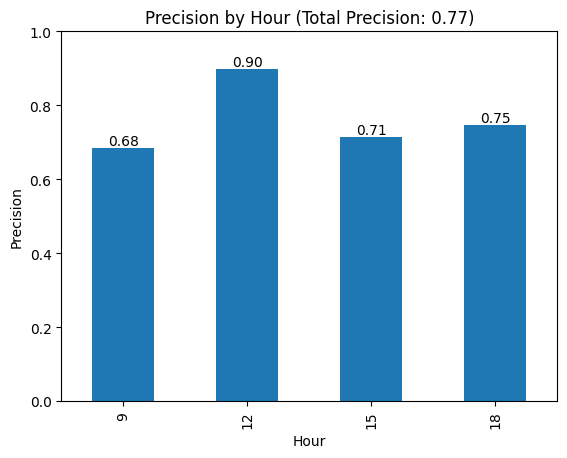

In [879]:
precision = tp_df.groupby('hour').size() / predicted.groupby('hour').size()

ax = precision.plot(kind='bar')

for i, v in enumerate(precision):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.title(f'Precision by Hour (Total Precision: {calculatePrecision(measured_actions, predicted_actions):.2f})')
plt.ylabel('Precision')
plt.xlabel('Hour')
plt.ylim(0, 1)

(0.0, 1.0)

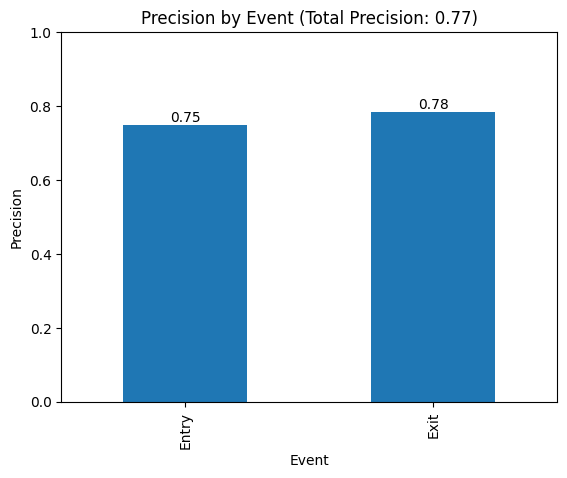

In [880]:
precision = tp_df.groupby('action').size() / predicted.groupby('action').size()

ax = precision.plot(kind='bar')

for i, v in enumerate(precision):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.title(f'Precision by Event (Total Precision: {calculatePrecision(measured_actions, predicted_actions):.2f})')
plt.ylabel('Precision')
plt.xlabel('Event')
plt.ylim(0, 1)

(0.0, 1.05)

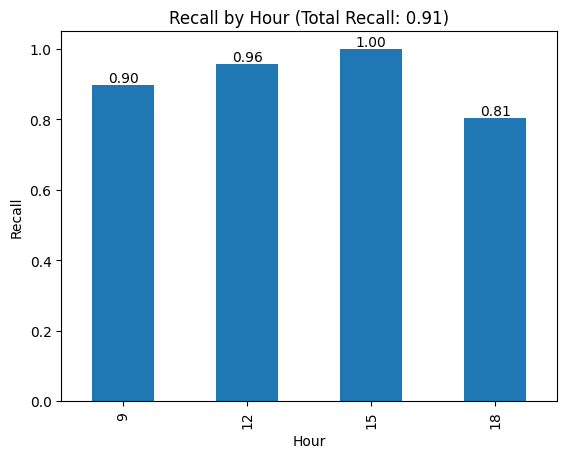

In [881]:
recall = tp_df.groupby('hour').size() / measured_temp.groupby('hour').size()

ax = recall.plot(kind='bar')

for i, v in enumerate(recall):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.title('Recall by Hour (Total Recall: {:.2f})'.format(calculateRecall(measured_actions, predicted_actions)))
plt.ylabel('Recall')
plt.xlabel('Hour')
plt.ylim(0, 1.05)

(0.0, 1.1)

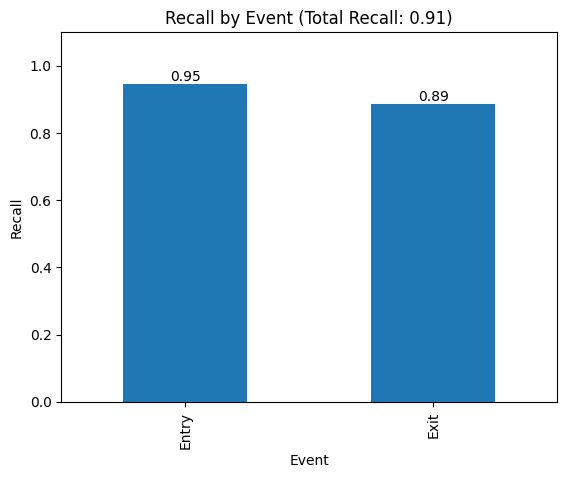

In [882]:
recall = tp_df.groupby('action').size() / measured_temp.groupby('action').size()

ax = recall.plot(kind='bar')

for i, v in enumerate(recall):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.title('Recall by Event (Total Recall: {:.2f})'.format(calculateRecall(measured_actions, predicted_actions)))
plt.ylabel('Recall')
plt.xlabel('Event')
plt.ylim(0, 1.1)

In [883]:
### Generate a plot showing where there is more false positives ###

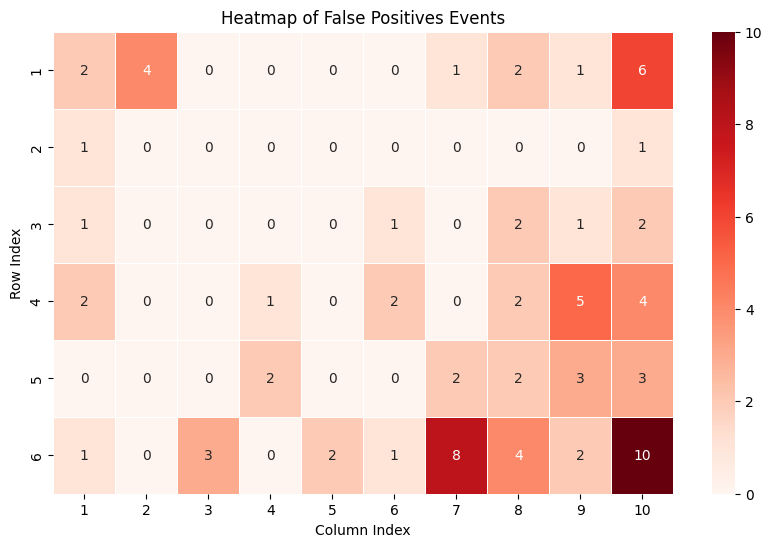

In [884]:
# create heat map with 6 rows and 10 columns and show the heat value as action in dt #

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dt = fp_df.groupby('nest', as_index=False).count()[['nest', 'action']].sort_values('action', ascending=False)
dt.reset_index(drop=True, inplace=True)
dt.rename(columns={'action': 'count'}, inplace=True)

df =  dt #pd.DataFrame(data)

# Create a 6x10 grid initialized with zeros
grid = np.zeros((6, 10))

# Assign counts to corresponding positions
for index, row in df.iterrows():
    nest = row["nest"] - 1  # Convert to zero-based index
    count = row["count"]
    row_idx = nest // 10  # Determine row (0 to 5)
    col_idx = nest % 10   # Determine column (0 to 9)
    grid[row_idx, col_idx] = count

# Plot heatmap with x and y labels starting from 1
plt.figure(figsize=(10, 6))
ax = sns.heatmap(grid, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, cbar=True)

# Adjust x and y tick labels to start from 1
ax.set_xticks(np.arange(10) + 0.5)
ax.set_yticks(np.arange(6) + 0.5)
ax.set_xticklabels(range(1, 11))
ax.set_yticklabels(range(1, 7))

# Set labels
plt.title("Heatmap of False Positives Events")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# Show plot
plt.show()


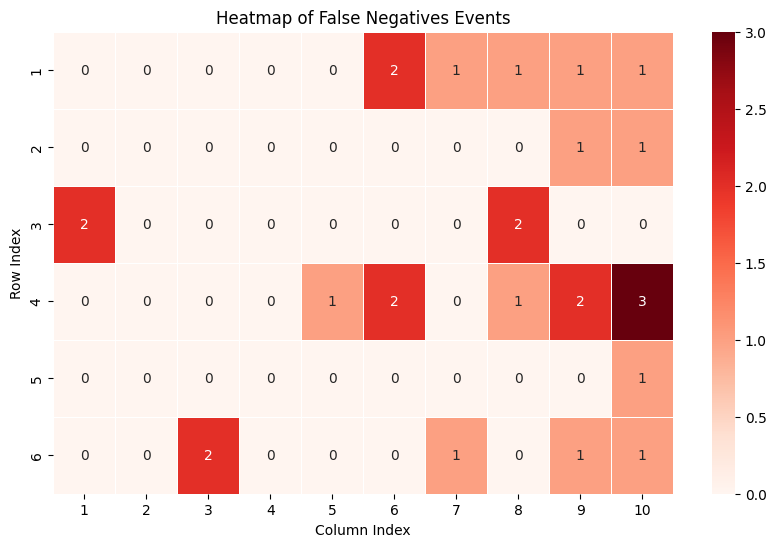

In [885]:
dt_n = fn_df.groupby('nest', as_index=False).count()[['nest', 'action']].sort_values('action', ascending=False)
dt_n.reset_index(drop=True, inplace=True)
dt_n.rename(columns={'action': 'count'}, inplace=True)


df =  dt_n #pd.DataFrame(data)

# Create a 6x10 grid initialized with zeros
grid = np.zeros((6, 10))

# Assign counts to corresponding positions
for index, row in df.iterrows():
    nest = row["nest"] - 1  # Convert to zero-based index
    count = row["count"]
    row_idx = nest // 10  # Determine row (0 to 5)
    col_idx = nest % 10   # Determine column (0 to 9)
    #print(row_idx, col_idx)
    grid[row_idx, col_idx] = count

# Plot heatmap with x and y labels starting from 1
plt.figure(figsize=(10, 6))
ax = sns.heatmap(grid, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, cbar=True)

# Adjust x and y tick labels to start from 1
ax.set_xticks(np.arange(10) + 0.5)
ax.set_yticks(np.arange(6) + 0.5)
ax.set_xticklabels(range(1, 11))
ax.set_yticklabels(range(1, 7))

# Set labels
plt.title("Heatmap of False Negatives Events")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# Show plot
plt.show()

Text(95.72222222222221, 0.5, 'Row Index')

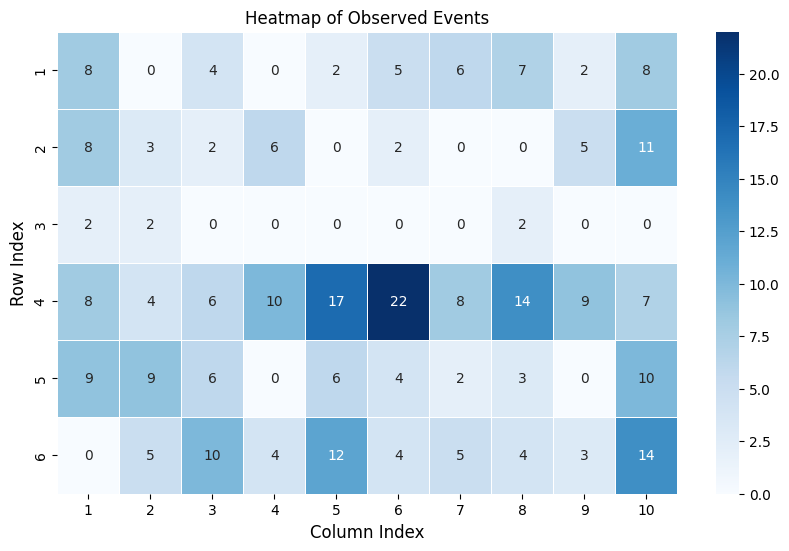

In [886]:
dt_m = measured.groupby('nest', as_index=False).count()[['nest', 'action']].sort_values('action', ascending=False)
dt_m.reset_index(drop=True, inplace=True)
dt_m.rename(columns={'action': 'count'}, inplace=True)

df =  dt_m #pd.DataFrame(data)

# Create a 6x10 grid initialized with zeros
grid = np.zeros((6, 10))

# Assign counts to corresponding positions
for index, row in df.iterrows():
    nest = row["nest"] - 1  # Convert to zero-based index
    count = row["count"]
    row_idx = nest // 10  # Determine row (0 to 5)
    col_idx = nest % 10   # Determine column (0 to 9)
    grid[int(row_idx), int(col_idx)] = int(count)

# Plot heatmap with x and y labels starting from 1
plt.figure(figsize=(10, 6))
ax = sns.heatmap(grid, annot=True, fmt=".0f", cmap="Blues", linewidths=0.5, cbar=True)

# Adjust x and y tick labels to start from 1
ax.set_xticks(np.arange(10) + 0.5)
ax.set_yticks(np.arange(6) + 0.5)
ax.set_xticklabels(range(1, 11))
ax.set_yticklabels(range(1, 7))

# Set labels
plt.title("Heatmap of Observed Events", fontsize=font_size)
plt.xlabel("Column Index", fontsize=font_size)
plt.ylabel("Row Index", fontsize=font_size)

# Show plot

Text(95.72222222222221, 0.5, 'Row Index')

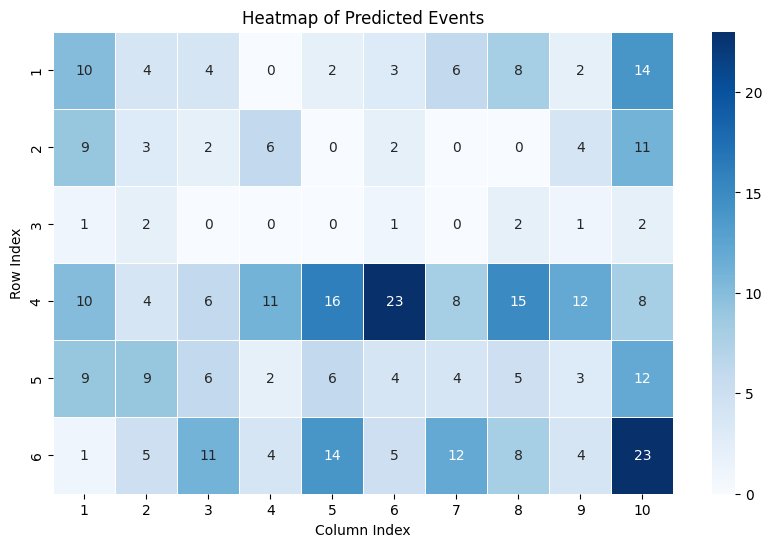

In [887]:
dt_m = predicted.groupby('nest', as_index=False).count()[['nest', 'action']].sort_values('action', ascending=False)
dt_m.reset_index(drop=True, inplace=True)
dt_m.rename(columns={'action': 'count'}, inplace=True)

df =  dt_m #pd.DataFrame(data)

# Create a 6x10 grid initialized with zeros
grid = np.zeros((6, 10))

# Assign counts to corresponding positions
for index, row in df.iterrows():
    nest = int(row["nest"]) - 1  # Convert to zero-based index
    count = row["count"]
    row_idx = nest // 10  # Determine row (0 to 5)
    col_idx = nest % 10   # Determine column (0 to 9)
    grid[int(row_idx), int(col_idx)] = int(count)

# Plot heatmap with x and y labels starting from 1
plt.figure(figsize=(10, 6))
ax = sns.heatmap(grid, annot=True, fmt=".0f", cmap="Blues", linewidths=0.5, cbar=True)

# Adjust x and y tick labels to start from 1
ax.set_xticks(np.arange(10) + 0.5)
ax.set_yticks(np.arange(6) + 0.5)
ax.set_xticklabels(range(1, 11))
ax.set_yticklabels(range(1, 7))

# Set labels
plt.title("Heatmap of Predicted Events")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# Show plot

Text(0.5, 1.0, 'Predicted Events')

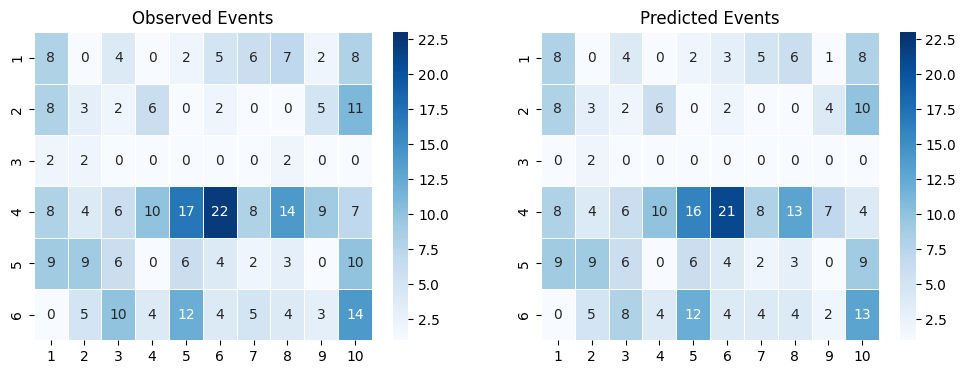

In [888]:
# make plot with two panels

# make plot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


# Determine the common scale limits
vmin = min(dt_m['count'].min(), predicted.groupby('nest').count()['action'].min())
vmax = max(dt_m['count'].max(), predicted.groupby('nest').count()['action'].max())

# panel 1


dt_m = measured.groupby('nest', as_index=False).count()[['nest', 'action']].sort_values('action', ascending=False)
dt_m.reset_index(drop=True, inplace=True)
dt_m.rename(columns={'action': 'count'}, inplace=True)

df =  dt_m #pd.DataFrame(data)

# Create a 6x10 grid initialized with zeros
grid = np.zeros((6, 10))

# Assign counts to corresponding positions
for index, row in df.iterrows():
    nest = int(row["nest"]) - 1  # Convert to zero-based index
    count = row["count"]
    row_idx = nest // 10  # Determine row (0 to 5)
    col_idx = nest % 10   # Determine column (0 to 9)
    grid[int(row_idx), int(col_idx)] = int(count)

# Plot heatmap with x and y labels starting from 1
#plt.figure(figsize=(10, 6))
ax = sns.heatmap(grid, annot=True, fmt=".0f", cmap="Blues", linewidths=0.5, cbar=True, ax=ax1, vmin=vmin, vmax=vmax)

# Adjust x and y tick labels to start from 1
ax1.set_xticks(np.arange(10) + 0.5)
ax1.set_yticks(np.arange(6) + 0.5)
ax1.set_xticklabels(range(1, 11))
ax1.set_yticklabels(range(1, 7))

# # Set labels
# plt.title("Heatmap of Predicted Events")
# plt.xlabel("Column Index")
# plt.ylabel("Row Index")

ax1.set_title("Observed Events")
# ax1.set_xlabel("Column Index")
# ax1.set_ylabel("Row Index")


# panel 2


dt_m = tp_df.groupby('nest', as_index=False).count()[['nest', 'action']].sort_values('action', ascending=False)
dt_m.reset_index(drop=True, inplace=True)
dt_m.rename(columns={'action': 'count'}, inplace=True)

df =  dt_m #pd.DataFrame(data)

# Create a 6x10 grid initialized with zeros
grid = np.zeros((6, 10))

# Assign counts to corresponding positions
for index, row in df.iterrows():
    nest = int(row["nest"]) - 1  # Convert to zero-based index
    count = row["count"]
    row_idx = nest // 10  # Determine row (0 to 5)
    col_idx = nest % 10   # Determine column (0 to 9)
    grid[int(row_idx), int(col_idx)] = int(count)

# Plot heatmap with x and y labels starting from 1
#plt.figure(figsize=(10, 6))
ax = sns.heatmap(grid, annot=True, fmt=".0f", cmap="Blues", linewidths=0.5, cbar=True, ax=ax2, vmin=vmin, vmax=vmax)

# Adjust x and y tick labels to start from 1
ax2.set_xticks(np.arange(10) + 0.5)
ax2.set_yticks(np.arange(6) + 0.5)
ax2.set_xticklabels(range(1, 11))
ax2.set_yticklabels(range(1, 7))

# # Set labels
# plt.title("Heatmap of Predicted Events")
# plt.xlabel("Column Index")
# plt.ylabel("Row Index")

ax2.set_title("Predicted Events")
# ax2.set_xlabel("Column Index")
# ax2.set_ylabel("Row Index")

# set the same legend limits for both panles


In [889]:
tp_df

,action,timestamp,nest,video,hour
0,Entry,09:01:49,31,mendels_2024-04-30_09_00_00,9
1,Exit,09:02:01,31,mendels_2024-04-30_09_00_00,9
2,Entry,09:02:13,39,mendels_2024-04-30_09_00_00,9
3,Exit,09:05:02,39,mendels_2024-04-30_09_00_00,9
4,Entry,09:07:40,31,mendels_2024-04-30_09_00_00,9
...,...,...,...,...,...
270,Exit,18:29:32,19,mendels_2024-05-23_18_20_01,18
271,Entry,18:29:37,60,mendels_2024-05-23_18_20_01,18
272,Entry,18:29:47,42,mendels_2024-05-23_18_20_01,18
273,Exit,18:29:54,6,mendels_2024-05-23_18_20_01,18


In [890]:
## organize by entry and exit events specifically ##

Text(0.5, 1.0, 'False Positive Exit Events')

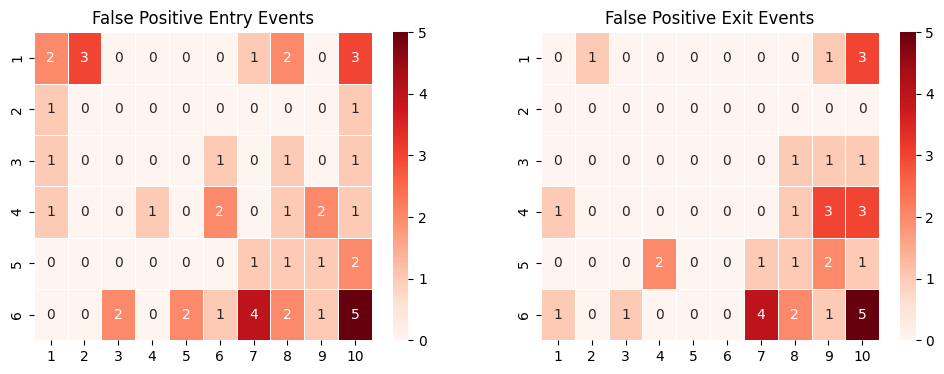

In [891]:
# make plot with two panels

# make plot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


# Determine the common scale limits
vmin = 0 #min(dt_m['count'].min(), fp_df.groupby('nest').count()['action'].min())
vmax = 5 #max(dt_m['count'].max(), fp_df.groupby('nest').count()['action'].max())

# panel 1


dt = fp_df[fp_df['action'] == 'Entry'].groupby('nest', as_index=False).count()[['nest', 'action']].sort_values('action', ascending=False)
dt.reset_index(drop=True, inplace=True)
dt.rename(columns={'action': 'count'}, inplace=True)

df =  dt #pd.DataFrame(data)

# Create a 6x10 grid initialized with zeros
grid = np.zeros((6, 10))

# Assign counts to corresponding positions
for index, row in df.iterrows():
    nest = int(row["nest"]) - 1  # Convert to zero-based index
    count = row["count"]
    row_idx = nest // 10  # Determine row (0 to 5)
    col_idx = nest % 10   # Determine column (0 to 9)
    grid[int(row_idx), int(col_idx)] = int(count)

# Plot heatmap with x and y labels starting from 1
#plt.figure(figsize=(10, 6))
ax = sns.heatmap(grid, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, cbar=True, ax=ax1, vmin=vmin, vmax=vmax)

# Adjust x and y tick labels to start from 1
ax1.set_xticks(np.arange(10) + 0.5)
ax1.set_yticks(np.arange(6) + 0.5)
ax1.set_xticklabels(range(1, 11))
ax1.set_yticklabels(range(1, 7))

# # Set labels
# plt.title("Heatmap of Predicted Events")
# plt.xlabel("Column Index")
# plt.ylabel("Row Index")

ax1.set_title("False Positive Entry Events")
#ax1.set_xlabel("Column Index")
#ax1.set_ylabel("Row Index")


# panel 2


dt = fp_df[fp_df['action'] == 'Exit'].groupby('nest', as_index=False).count()[['nest', 'action']].sort_values('action', ascending=False)
dt.reset_index(drop=True, inplace=True)
dt.rename(columns={'action': 'count'}, inplace=True)

df =  dt #pd.DataFrame(data)

# Create a 6x10 grid initialized with zeros
grid = np.zeros((6, 10))

# Assign counts to corresponding positions
for index, row in df.iterrows():
    nest = int(row["nest"]) - 1  # Convert to zero-based index
    count = row["count"]
    row_idx = nest // 10  # Determine row (0 to 5)
    col_idx = nest % 10   # Determine column (0 to 9)
    grid[int(row_idx), int(col_idx)] = int(count)

# Plot heatmap with x and y labels starting from 1
#plt.figure(figsize=(10, 6))
ax = sns.heatmap(grid, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, cbar=True, ax=ax2, vmin=vmin, vmax=vmax)

# Adjust x and y tick labels to start from 1
ax2.set_xticks(np.arange(10) + 0.5)
ax2.set_yticks(np.arange(6) + 0.5)
ax2.set_xticklabels(range(1, 11))
ax2.set_yticklabels(range(1, 7))

# # Set labels
# plt.title("Heatmap of Predicted Events")
# plt.xlabel("Column Index")
# plt.ylabel("Row Index")

ax2.set_title("False Positive Exit Events")
#ax2.set_xlabel("Column Index")
#ax2.set_ylabel("Row Index")

# set the same legend limits for both panles


Text(0.5, 1.0, 'False Negative Exit Events')

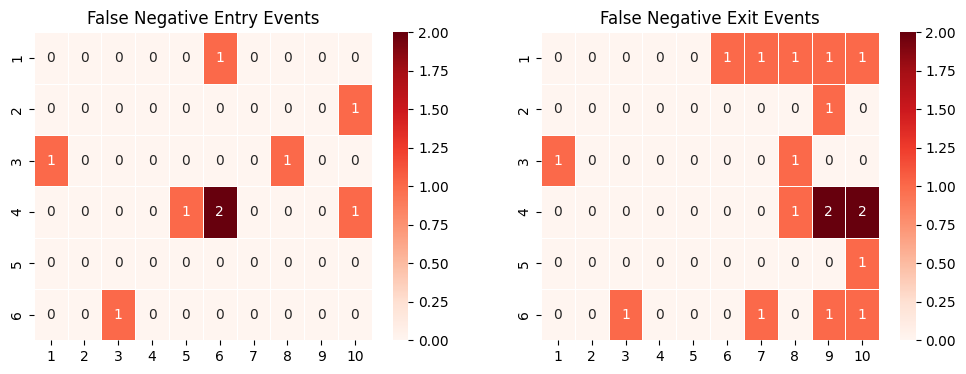

In [892]:
# make plot with two panels

# make plot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


# Determine the common scale limits
vmin = 0 #min(dt_m['count'].min(), fp_df.groupby('nest').count()['action'].min())
vmax = 2 #max(dt_m['count'].max(), fp_df.groupby('nest').count()['action'].max())

# panel 1


dt = fn_df[fn_df['action'] == 'Entry'].groupby('nest', as_index=False).count()[['nest', 'action']].sort_values('action', ascending=False)
dt.reset_index(drop=True, inplace=True)
dt.rename(columns={'action': 'count'}, inplace=True)

df =  dt #pd.DataFrame(data)

# Create a 6x10 grid initialized with zeros
grid = np.zeros((6, 10))

# Assign counts to corresponding positions
for index, row in df.iterrows():
    nest = int(row["nest"]) - 1  # Convert to zero-based index
    count = row["count"]
    row_idx = nest // 10  # Determine row (0 to 5)
    col_idx = nest % 10   # Determine column (0 to 9)
    grid[int(row_idx), int(col_idx)] = int(count)

# Plot heatmap with x and y labels starting from 1
#plt.figure(figsize=(10, 6))
ax = sns.heatmap(grid, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, cbar=True, ax=ax1, vmin=vmin, vmax=vmax)

# Adjust x and y tick labels to start from 1
ax1.set_xticks(np.arange(10) + 0.5)
ax1.set_yticks(np.arange(6) + 0.5)
ax1.set_xticklabels(range(1, 11))
ax1.set_yticklabels(range(1, 7))

# # Set labels
# plt.title("Heatmap of Predicted Events")
# plt.xlabel("Column Index")
# plt.ylabel("Row Index")

ax1.set_title("False Negative Entry Events")
#ax1.set_xlabel("Column Index")
#ax1.set_ylabel("Row Index")


# panel 2


dt = fn_df[fn_df['action'] == 'Exit'].groupby('nest', as_index=False).count()[['nest', 'action']].sort_values('action', ascending=False)
dt.reset_index(drop=True, inplace=True)
dt.rename(columns={'action': 'count'}, inplace=True)

df =  dt #pd.DataFrame(data)

# Create a 6x10 grid initialized with zeros
grid = np.zeros((6, 10))

# Assign counts to corresponding positions
for index, row in df.iterrows():
    nest = int(row["nest"]) - 1  # Convert to zero-based index
    count = row["count"]
    row_idx = nest // 10  # Determine row (0 to 5)
    col_idx = nest % 10   # Determine column (0 to 9)
    grid[int(row_idx), int(col_idx)] = int(count)

# Plot heatmap with x and y labels starting from 1
#plt.figure(figsize=(10, 6))
ax = sns.heatmap(grid, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, cbar=True, ax=ax2, vmin=vmin, vmax=vmax)

# Adjust x and y tick labels to start from 1
ax2.set_xticks(np.arange(10) + 0.5)
ax2.set_yticks(np.arange(6) + 0.5)
ax2.set_xticklabels(range(1, 11))
ax2.set_yticklabels(range(1, 7))

# # Set labels
# plt.title("Heatmap of Predicted Events")
# plt.xlabel("Column Index")
# plt.ylabel("Row Index")

ax2.set_title("False Negative Exit Events")
#ax2.set_xlabel("Column Index")
#ax2.set_ylabel("Row Index")

# set the same legend limits for both panles


Text(627.9949494949494, 0.5, 'Row Index')

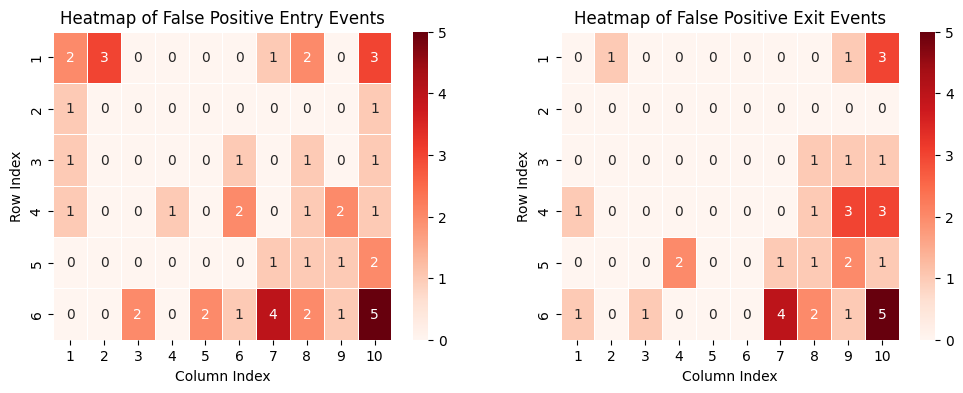

In [893]:
# make plot with two panels

# make plot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


# Determine the common scale limits
vmin = 0 #min(dt_m['count'].min(), fp_df.groupby('nest').count()['action'].min())
vmax = 5 #max(dt_m['count'].max(), fp_df.groupby('nest').count()['action'].max())

# panel 1


dt = fp_df[fp_df['action'] == 'Entry'].groupby('nest', as_index=False).count()[['nest', 'action']].sort_values('action', ascending=False)
dt.reset_index(drop=True, inplace=True)
dt.rename(columns={'action': 'count'}, inplace=True)

df =  dt #pd.DataFrame(data)

# Create a 6x10 grid initialized with zeros
grid = np.zeros((6, 10))

# Assign counts to corresponding positions
for index, row in df.iterrows():
    nest = int(row["nest"]) - 1  # Convert to zero-based index
    count = row["count"]
    row_idx = nest // 10  # Determine row (0 to 5)
    col_idx = nest % 10   # Determine column (0 to 9)
    grid[int(row_idx), int(col_idx)] = int(count)

# Plot heatmap with x and y labels starting from 1
#plt.figure(figsize=(10, 6))
ax = sns.heatmap(grid, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, cbar=True, ax=ax1, vmin=vmin, vmax=vmax)

# Adjust x and y tick labels to start from 1
ax1.set_xticks(np.arange(10) + 0.5)
ax1.set_yticks(np.arange(6) + 0.5)
ax1.set_xticklabels(range(1, 11))
ax1.set_yticklabels(range(1, 7))

# # Set labels
# plt.title("Heatmap of Predicted Events")
# plt.xlabel("Column Index")
# plt.ylabel("Row Index")

ax1.set_title("Heatmap of False Positive Entry Events")
ax1.set_xlabel("Column Index")
ax1.set_ylabel("Row Index")


# panel 2


dt = fp_df[fp_df['action'] == 'Exit'].groupby('nest', as_index=False).count()[['nest', 'action']].sort_values('action', ascending=False)
dt.reset_index(drop=True, inplace=True)
dt.rename(columns={'action': 'count'}, inplace=True)

df =  dt #pd.DataFrame(data)

# Create a 6x10 grid initialized with zeros
grid = np.zeros((6, 10))

# Assign counts to corresponding positions
for index, row in df.iterrows():
    nest = int(row["nest"]) - 1  # Convert to zero-based index
    count = row["count"]
    row_idx = nest // 10  # Determine row (0 to 5)
    col_idx = nest % 10   # Determine column (0 to 9)
    grid[int(row_idx), int(col_idx)] = int(count)

# Plot heatmap with x and y labels starting from 1
#plt.figure(figsize=(10, 6))
ax = sns.heatmap(grid, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, cbar=True, ax=ax2, vmin=vmin, vmax=vmax)

# Adjust x and y tick labels to start from 1
ax2.set_xticks(np.arange(10) + 0.5)
ax2.set_yticks(np.arange(6) + 0.5)
ax2.set_xticklabels(range(1, 11))
ax2.set_yticklabels(range(1, 7))

# # Set labels
# plt.title("Heatmap of Predicted Events")
# plt.xlabel("Column Index")
# plt.ylabel("Row Index")

ax2.set_title("Heatmap of False Positive Exit Events")
ax2.set_xlabel("Column Index")
ax2.set_ylabel("Row Index")

# set the same legend limits for both panles


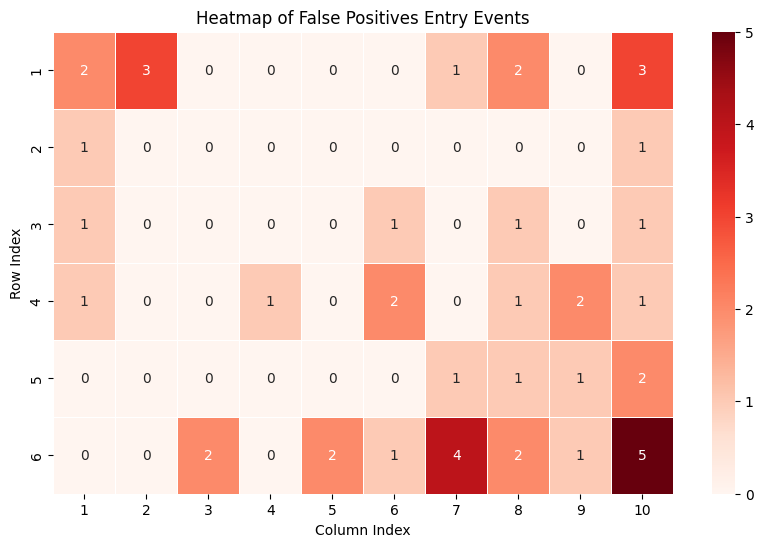

In [894]:
# create heat map with 6 rows and 10 columns and show the heat value as action in dt #

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dt = fp_df[fp_df['action'] == 'Entry'].groupby('nest', as_index=False).count()[['nest', 'action']].sort_values('action', ascending=False)
dt.reset_index(drop=True, inplace=True)
dt.rename(columns={'action': 'count'}, inplace=True)

df =  dt #pd.DataFrame(data)

# Create a 6x10 grid initialized with zeros
grid = np.zeros((6, 10))

# Assign counts to corresponding positions
for index, row in df.iterrows():
    nest = row["nest"] - 1  # Convert to zero-based index
    count = row["count"]
    row_idx = nest // 10  # Determine row (0 to 5)
    col_idx = nest % 10   # Determine column (0 to 9)
    grid[row_idx, col_idx] = count

# Plot heatmap with x and y labels starting from 1
plt.figure(figsize=(10, 6))
ax = sns.heatmap(grid, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, cbar=True)

# Adjust x and y tick labels to start from 1
ax.set_xticks(np.arange(10) + 0.5)
ax.set_yticks(np.arange(6) + 0.5)
ax.set_xticklabels(range(1, 11))
ax.set_yticklabels(range(1, 7))

# Set labels
plt.title("Heatmap of False Positives Entry Events")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# Show plot
plt.show()


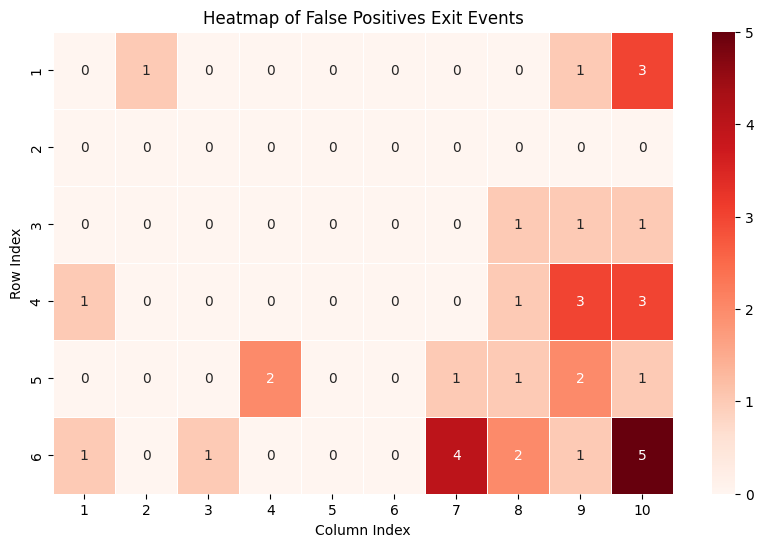

In [652]:
# create heat map with 6 rows and 10 columns and show the heat value as action in dt #

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dt = fp_df[fp_df['action'] == 'Exit'].groupby('nest', as_index=False).count()[['nest', 'action']].sort_values('action', ascending=False)
dt.reset_index(drop=True, inplace=True)
dt.rename(columns={'action': 'count'}, inplace=True)

df =  dt #pd.DataFrame(data)

# Create a 6x10 grid initialized with zeros
grid = np.zeros((6, 10))

# Assign counts to corresponding positions
for index, row in df.iterrows():
    nest = row["nest"] - 1  # Convert to zero-based index
    count = row["count"]
    row_idx = nest // 10  # Determine row (0 to 5)
    col_idx = nest % 10   # Determine column (0 to 9)
    grid[row_idx, col_idx] = count

# Plot heatmap with x and y labels starting from 1
plt.figure(figsize=(10, 6))
ax = sns.heatmap(grid, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, cbar=True)

# Adjust x and y tick labels to start from 1
ax.set_xticks(np.arange(10) + 0.5)
ax.set_yticks(np.arange(6) + 0.5)
ax.set_xticklabels(range(1, 11))
ax.set_yticklabels(range(1, 7))

# Set labels
plt.title("Heatmap of False Positives Exit Events")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# Show plot
plt.show()


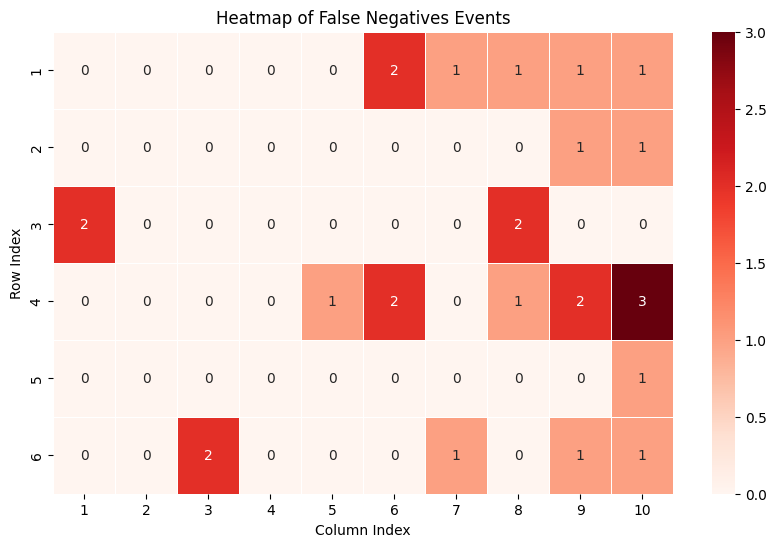

In [655]:
dt_n = fn_df.groupby('nest', as_index=False).count()[['nest', 'action']].sort_values('action', ascending=False)
dt_n.reset_index(drop=True, inplace=True)
dt_n.rename(columns={'action': 'count'}, inplace=True)


df =  dt_n #pd.DataFrame(data)

# Create a 6x10 grid initialized with zeros
grid = np.zeros((6, 10))

# Assign counts to corresponding positions
for index, row in df.iterrows():
    nest = row["nest"] - 1  # Convert to zero-based index
    count = row["count"]
    row_idx = nest // 10  # Determine row (0 to 5)
    col_idx = nest % 10   # Determine column (0 to 9)
    #print(row_idx, col_idx)
    grid[row_idx, col_idx] = count

# Plot heatmap with x and y labels starting from 1
plt.figure(figsize=(10, 6))
ax = sns.heatmap(grid, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, cbar=True)

# Adjust x and y tick labels to start from 1
ax.set_xticks(np.arange(10) + 0.5)
ax.set_yticks(np.arange(6) + 0.5)
ax.set_xticklabels(range(1, 11))
ax.set_yticklabels(range(1, 7))

# Set labels
plt.title("Heatmap of False Negatives Events")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# Show plot
plt.show()

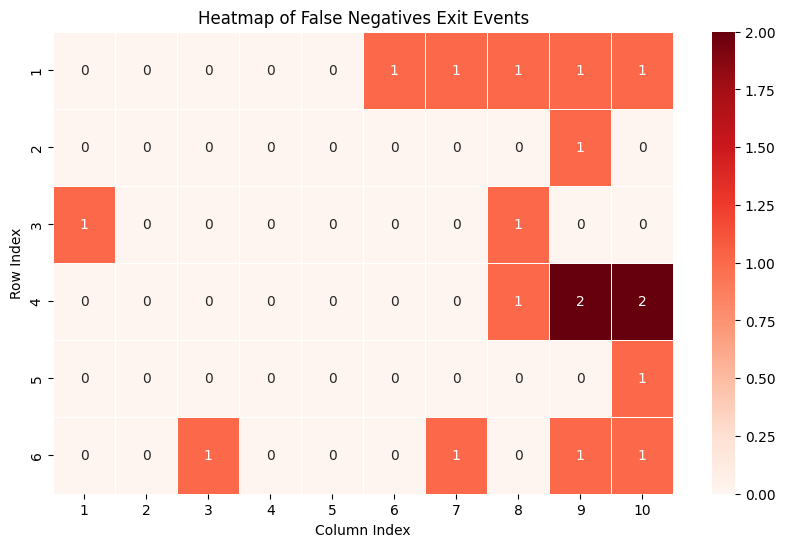

In [663]:
dt_n = fn_df[fn_df["action"] == "Exit"].groupby('nest', as_index=False).count()[['nest', 'action']].sort_values('action', ascending=False)
dt_n.reset_index(drop=True, inplace=True)
dt_n.rename(columns={'action': 'count'}, inplace=True)


df =  dt_n #pd.DataFrame(data)

# Create a 6x10 grid initialized with zeros
grid = np.zeros((6, 10))

# Assign counts to corresponding positions
for index, row in df.iterrows():
    nest = row["nest"] - 1  # Convert to zero-based index
    count = row["count"]
    row_idx = nest // 10  # Determine row (0 to 5)
    col_idx = nest % 10   # Determine column (0 to 9)
    #print(row_idx, col_idx)
    grid[row_idx, col_idx] = count

# Plot heatmap with x and y labels starting from 1
plt.figure(figsize=(10, 6))
ax = sns.heatmap(grid, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, cbar=True)

# Adjust x and y tick labels to start from 1
ax.set_xticks(np.arange(10) + 0.5)
ax.set_yticks(np.arange(6) + 0.5)
ax.set_xticklabels(range(1, 11))
ax.set_yticklabels(range(1, 7))

# Set labels
plt.title("Heatmap of False Negatives Exit Events")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# Show plot
plt.show()

In [657]:
fn_df.groupby('action').count()

,timestamp,nest,video
action,,,
Entry,9,9,9
Exit,18,18,18


In [658]:
fp_df.groupby('action').count()

,timestamp,nest,video
action,,,
Entry,47,47,47
Exit,37,37,37


In [708]:
tp_df

,action,timestamp,nest,video,hour
0,Entry,09:01:49,31,mendels_2024-04-30_09_00_00,9
1,Exit,09:02:01,31,mendels_2024-04-30_09_00_00,9
2,Entry,09:02:13,39,mendels_2024-04-30_09_00_00,9
3,Exit,09:05:02,39,mendels_2024-04-30_09_00_00,9
4,Entry,09:07:40,31,mendels_2024-04-30_09_00_00,9
...,...,...,...,...,...
270,Exit,18:29:32,19,mendels_2024-05-23_18_20_01,18
271,Entry,18:29:37,60,mendels_2024-05-23_18_20_01,18
272,Entry,18:29:47,42,mendels_2024-05-23_18_20_01,18
273,Exit,18:29:54,6,mendels_2024-05-23_18_20_01,18


In [895]:
recall = tp_df.groupby('video').size() / measured_temp.groupby('video').size()

In [896]:
recall

video
mendels_2024-04-30_09_00_00    1.000000
mendels_2024-04-30_09_10_01    0.750000
mendels_2024-04-30_09_20_00    0.888889
mendels_2024-04-30_09_30_00    0.944444
mendels_2024-04-30_09_40_01    1.000000
mendels_2024-05-08_15_00_00    1.043478
mendels_2024-05-08_15_30_00    1.000000
mendels_2024-05-08_15_50_00    0.956522
mendels_2024-05-23_12_00_00    1.000000
mendels_2024-05-23_12_40_00    0.939394
mendels_2024-05-23_18_20_01    0.805195
dtype: float64

In [711]:
tp_df.groupby('video').size() / predicted.groupby('video').size()

video
mendels_2024-04-30_09_00_00    0.625000
mendels_2024-04-30_09_10_01    0.571429
mendels_2024-04-30_09_20_00    0.500000
mendels_2024-04-30_09_30_00    1.000000
mendels_2024-04-30_09_40_01    0.833333
mendels_2024-05-08_15_00_00    0.727273
mendels_2024-05-08_15_30_00    0.838710
mendels_2024-05-08_15_50_00    0.594595
mendels_2024-05-23_12_00_00    0.870968
mendels_2024-05-23_12_40_00    0.911765
mendels_2024-05-23_18_20_01    0.746988
dtype: float64

In [900]:
measured_temp.groupby('video').size()

video
mendels_2024-04-30_09_00_00    10
mendels_2024-04-30_09_10_01    16
mendels_2024-04-30_09_20_00     9
mendels_2024-04-30_09_30_00    18
mendels_2024-04-30_09_40_01     5
mendels_2024-05-08_15_00_00    23
mendels_2024-05-08_15_30_00    26
mendels_2024-05-08_15_50_00    23
mendels_2024-05-23_12_00_00    27
mendels_2024-05-23_12_40_00    66
mendels_2024-05-23_18_20_01    77
dtype: int64

In [36]:
df[['video','processing_time']].groupby('video').mean()

,processing_time
video,
mendels_2024-04-30_09_00_00.mp4,201.262250
mendels_2024-04-30_09_10_01.mp4,155.163208
mendels_2024-04-30_09_20_00.mp4,177.997505
mendels_2024-04-30_09_30_00.mp4,373.254343
mendels_2024-04-30_09_40_01.mp4,222.734339
mendels_2024-05-08_15_00_00.mp4,260.352306
mendels_2024-05-08_15_30_00.mp4,229.963929
mendels_2024-05-08_15_50_00.mp4,287.827623
mendels_2024-05-23_12_00_00.mp4,107.046468


In [53]:
df['filename'].unique().tolist()

['mendels_2024-04-30_09_00_00.mp4',
 'mendels_2024-04-30_09_40_01.mp4',
 'mendels_2024-05-08_15_50_00.mp4',
 'mendels_2024-05-23_12_40_00.mp4',
 'mendels_2024-04-30_09_30_00.mp4',
 'mendels_2024-05-23_12_00_00.mp4',
 'mendels_2024-04-30_09_10_01.mp4',
 'mendels_2024-05-08_15_00_00.mp4',
 'mendels_2024-05-08_15_30_00.mp4',
 'mendels_2024-04-30_09_20_00.mp4',
 'mendels_2024-05-23_18_20_01.mp4']

In [55]:
import shutil

In [54]:
# copy files to new directory
for file in df['filename'].unique().tolist():
    shutil.copy(file, '/home/adam/Downloads/processed_files/')


'/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/scripts/processor/input'

In [32]:
[x/60 for x in df[['video','processing_time']].groupby('video').mean()['processing_time'].tolist()]

[3.3543708324432373,
 2.586053466796875,
 2.966625082492828,
 6.2209057211875916,
 3.7122389872868857,
 4.339205102125804,
 3.832732152938843,
 4.797127052148183,
 1.784107796351115,
 3.0070133010546365,
 4.808756852149964]

In [33]:
30*60*10

18000

In [34]:
[(30*60*10)/x for x in df[['video','processing_time']].groupby('video').mean()['processing_time'].tolist()]

[89.43554990951544,
 116.0068822442347,
 101.12501298880433,
 48.22448907692641,
 80.81376253721665,
 69.13708684870141,
 78.27314511658936,
 62.53743057850806,
 168.15127461107713,
 99.76676853899592,
 62.38618612331626]

In [744]:
np.mean(tp_df.groupby('hour').size() / predicted.groupby('hour').size()).tolist()

0.7607649160604076

In [745]:
np.mean(tp_df.groupby('video').size() / predicted.groupby('video').size()).tolist()

0.7472781185157861

In [746]:
np.mean(tp_df.groupby('video').size() / measured_temp.groupby('video').size()).tolist()

0.9389020070838252

In [901]:
video = '/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/scripts/processor/experiment_output_4/synthesized_video_mendels_2024-04-30_09_40_01_video.mp4'


In [902]:
import cv2


# Open the video
cap = cv2.VideoCapture(video)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    # Read the first frame
    ret, frame = cap.read()

    # if ret:
    #     # Display the first frame
    #     cv2.imshow('First Frame', frame)
    #     cv2.waitKey(0)  # Wait for a key press to close the window
    #     cv2.destroyAllWindows()
    # else:
    #     print("Error: Could not read the frame.")

# Release the video capture object
cap.release()


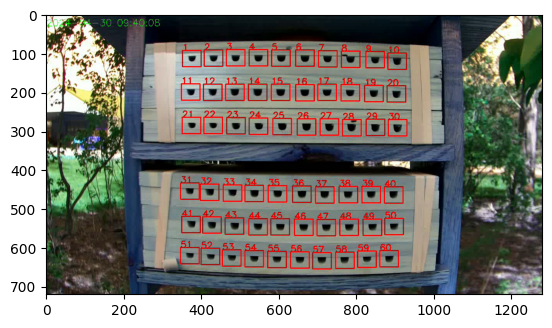

In [904]:
plt.imshow(frame)

In [44]:
### Analyze nesting and weather data ###

In [259]:
videos = aws_upload.ListFiles("beevision_source/mendels_2024-05-09")

In [260]:
processed_files = [os.path.join(output_folder_4, video) for video in videos]

In [261]:
processed_files = [video.replace('.mp4', '.csv') for video in processed_files]

In [262]:
df = pd.DataFrame()

for file in processed_files:
    try:
        df = pd.concat([df, pd.read_csv(file)])
    except:
        print(file)

/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/scripts/processor/experiment_output_4/mendels_2024-05-09_15_10_00.csv
/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/scripts/processor/experiment_output_4/mendels_2024-05-09_15_20_01.csv
/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/scripts/processor/experiment_output_4/mendels_2024-05-09_15_30_00.csv
/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/scripts/processor/experiment_output_4/mendels_2024-05-09_15_40_00.csv
/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/scripts/processor/experiment_output_4/mendels_2024-05-09_15_50_01.csv
/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/scripts/processor/experiment_output_4/mendels_2024-05-09_16_00_00.csv
/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/scripts/processor/experiment_output_4/mendels_2024-05-09_16_10_00.csv
/Users/edwardamoah/Documents/GitHub/BeeVision/so

In [263]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [264]:
df['hour'] = df['timestamp'].apply(lambda x: x.hour)

In [265]:
df['nest'] = df['nest'].apply(lambda x: int(x.split("_")[1]))

<Axes: xlabel='hour'>

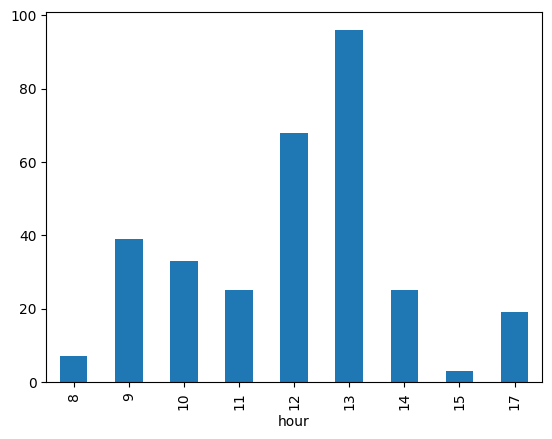

In [266]:
df.groupby('hour').size().plot(kind='bar')

<Axes: xlabel='nest'>

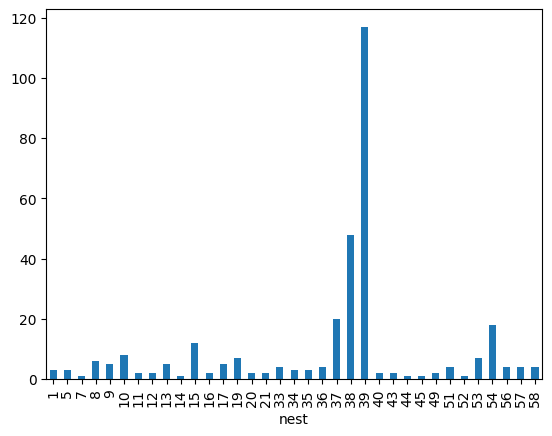

In [267]:
df.groupby('nest').size().plot(kind='bar')

In [268]:
temperature = pd.read_csv('/Users/edwardamoah/Downloads/mendels_2024_5_9.csv')

In [269]:
dt_t = temperature[["Time", "Temperature", "Humidity", "Speed", "Precip. Rate.", "Precip. Accum.", "Solar"]].dropna()

In [270]:
dt_t["time"] = pd.to_datetime(dt_t["Time"])

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_4906/3918621018.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt_t["time"] = pd.to_datetime(dt_t["Time"])


In [271]:
dt_t['hour'] = dt_t['time'].apply(lambda x: x.hour)

In [272]:
dt_t["temperature"] = dt_t["Temperature"].apply(lambda x: float(x[0:4]))
dt_t['humidity'] = dt_t['Humidity'].apply(lambda x: float(x[0:2]))
dt_t['speed'] = dt_t['Speed'].apply(lambda x: float(x[0:2]))
dt_t['precip_rate'] = dt_t['Precip. Rate.'].apply(lambda x: float(x[0:3]))
dt_t['precip_accum'] = dt_t['Precip. Accum.'].apply(lambda x: float(x[0:3]))
dt_t['solar'] = dt_t['Solar'].apply(lambda x: float(x[0:2]))

In [273]:
dt_t1 = dt_t[["hour", "temperature", "humidity", "speed", "precip_rate", "precip_accum", "solar"]].groupby('hour', as_index=False).mean()

In [274]:
df_1 = df[['hour', 'action']].groupby('hour', as_index=False).count()

In [275]:
dt2 = df_1.merge(dt_t1, on='hour')

<Axes: xlabel='hour'>

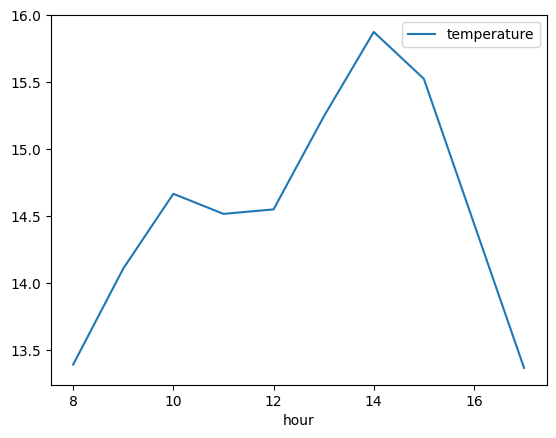

In [276]:
dt2.plot(x='hour', y='temperature')

<Axes: xlabel='hour'>

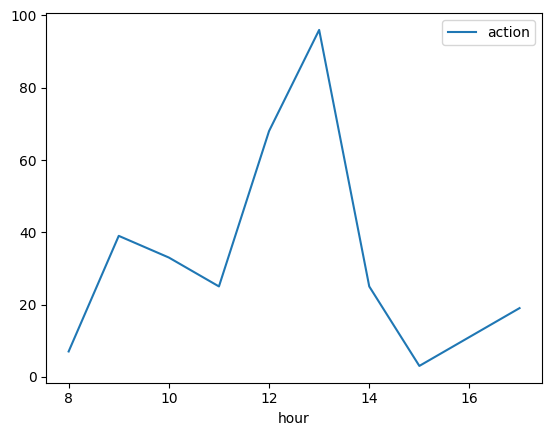

In [277]:
dt2.plot(x='hour', y='action')

In [278]:
dt2 = dt2[dt2['hour'] != 8]

In [279]:
dt2.rename(columns={'action': 'foraging_events'}, inplace=True)

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_4906/385249041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2.rename(columns={'action': 'foraging_events'}, inplace=True)


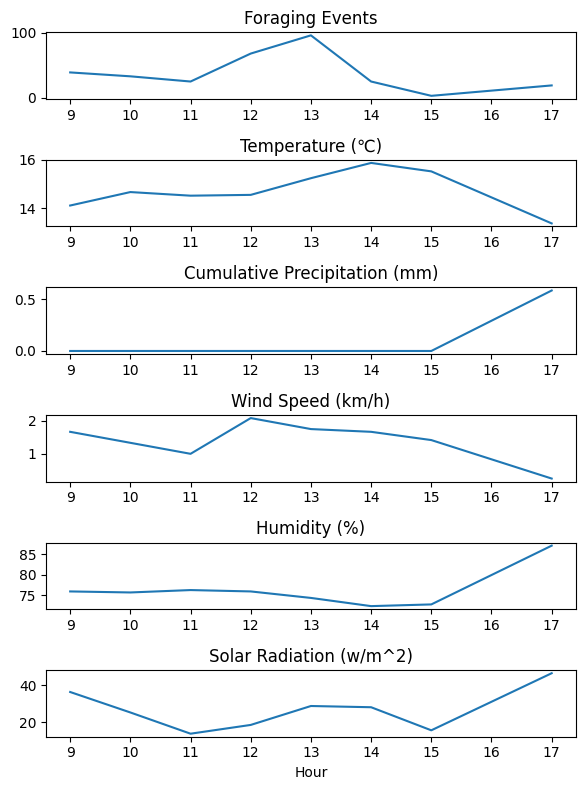

In [280]:
import matplotlib.pyplot as plt

# Create a figure and four subplots
fig, ((ax1, ax2, ax3, ax4, ax5, ax6)) = plt.subplots(6, 1, figsize=(6, 8))

# Plot the temperature data
ax1.plot(dt2['hour'], dt2['foraging_events'])
ax1.set_title('Foraging Events')

# Plot the humidity data
ax2.plot(dt2['hour'], dt2['temperature'])
ax2.set_title('Temperature (℃)')

# Plot the speed data
ax3.plot(dt2['hour'], dt2['precip_accum'])
ax3.set_title('Cumulative Precipitation (mm)')

# Plot the precipitation rate data
ax4.plot(dt2['hour'], dt2['speed'])
ax4.set_title('Wind Speed (km/h)')

# plot for humidity
ax5.plot(dt2['hour'], dt2['humidity'])
ax5.set_title('Humidity (%)')

# plot for solar radiation
ax6.plot(dt2['hour'], dt2['solar'])
ax6.set_title('Solar Radiation (w/m^2)')
ax6.set_xlabel('Hour')

# Add a common x-axis label
#fig.text(0.5, 0.04, 'Hour', ha='center')
#fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')

# overall title
#plt.suptitle('Weather and Foraging Events (2024-05-07)', fontsize=2)

# adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [281]:
correlation_matrix = dt2.corr()
correlation_matrix


,hour,foraging_events,temperature,humidity,speed,precip_rate,precip_accum,solar
hour,1.000000,-0.270383,0.037830,0.416510,-0.481249,0.662266,0.662266,0.281194
foraging_events,-0.270383,1.000000,0.059202,-0.156988,0.548692,-0.264493,-0.264493,0.023244
temperature,0.037830,0.059202,1.000000,-0.873547,0.588561,-0.685260,-0.685260,-0.561109
humidity,0.416510,-0.156988,-0.873547,1.000000,-0.797478,0.945472,0.945472,0.685891
speed,-0.481249,0.548692,0.588561,-0.797478,1.000000,-0.822362,-0.822362,-0.451628
precip_rate,0.662266,-0.264493,-0.685260,0.945472,-0.822362,1.000000,1.000000,0.729281
precip_accum,0.662266,-0.264493,-0.685260,0.945472,-0.822362,1.000000,1.000000,0.729281
solar,0.281194,0.023244,-0.561109,0.685891,-0.451628,0.729281,0.729281,1.000000


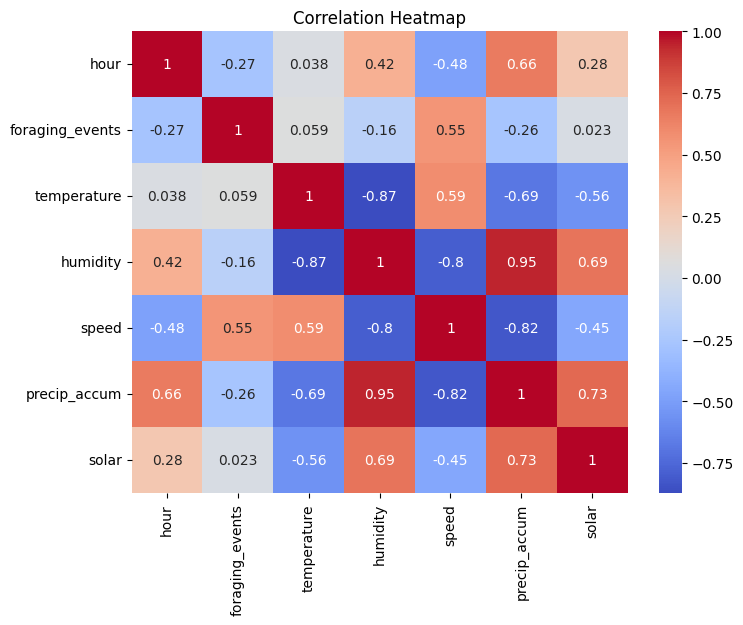

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude 'precip_rate' and 'precip_accum' columns
excluded_columns = ['precip_rate']
correlation_matrix_filtered = dt2.drop(excluded_columns, axis=1).corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
